# Ordinary differential equations

Let’s consider a simple 1st order equation: 

$\frac{dy}{dx}=f(x,y)$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

## Euler’s method

Supouse that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: 

$dx \approx \Delta x =x_1-x_0\\$
$dy \approx \Delta y =y_1-y_0$
 
with $y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:

$\frac{\Delta y}{\Delta x}=f(x,y)$ 

or 

$\Delta y = f(x,y)\Delta x$

and approximate the value of $y_1$ as
$y_1=y_0+f(x_0,y_0)(x_1-x_0)$.

We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as

$y_{2}=y_1+f(x_1,y_1)\Delta x,$ 

or in the general case:

$y_{n+1}=y_n+f(x_n,y_n)\Delta x$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

### Exercise 1.1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $\frac{dT}{dt}=-r(T-T_s),$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [13]:
T0 = 10
Ts = 83
r = 0.1
dt = .0001
tmax = 60
nsteps = int(tmax/dt)

In [14]:
T = T0
my_temp, my_time = [T], [0]
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    my_time.append(i*dt)
    my_temp.append(T)
    if i%100 == 0: print(i,i*dt,T)

100 0.01 10.072963876801229
200 0.02 10.145854825830998
300 0.030000000000000002 10.218672919980964
400 0.04 10.291418232069956
500 0.05 10.364090834844037
600 0.060000000000000005 10.436690800976535
700 0.07 10.50921820306815
800 0.08 10.581673113647012
900 0.09000000000000001 10.654055605168756
1000 0.1 10.726365750016614
1100 0.11 10.798603620501462
1200 0.12000000000000001 10.870769288861885
1300 0.13 10.942862827264292
1400 0.14 11.014884307802939
1500 0.15 11.086833802500045
1600 0.16 11.158711383305818
1700 0.17 11.230517122098563
1800 0.18000000000000002 11.30225109068474
1900 0.19 11.373913360799065
2000 0.2 11.44550400410451
2100 0.21000000000000002 11.517023092192444
2200 0.22 11.588470696582682
2300 0.23 11.659846888723543
2400 0.24000000000000002 11.731151739991935
2500 0.25 11.802385321693443
2600 0.26 11.873547705062343
2700 0.27 11.94463896126175
2800 0.28 12.01565916138364
2900 0.29000000000000004 12.086608376448929
3000 0.3 12.157486677407535
3100 0.31 12.228294135138

Let's try plotting the results. We first need to import the required libraries and methods

Text(0, 0.5, 'temp')

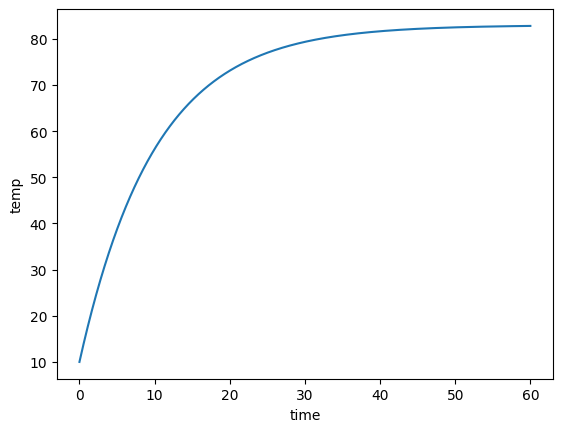

In [15]:
import numpy as np 
from matplotlib import pyplot as plt

plt.plot(my_time, my_temp)
plt.xlabel("time")
plt.ylabel("temp")

Alternatively, and in order to re use code in future problems, we could have created a function.

In [16]:
def euler(y, f, dx): # compute y_new = y + f*dx
    return y + f*dx

In [17]:
T = T0
for i in range(1,nsteps+1):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T

Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [18]:
euler = lambda y, f, dx: y + f*dx

Now, let's study the effects of different time steps $dt$ on the convergence. We expect that as $dt$ gets small, the result gets better and better but it's slower and slower

(48.0, 58.0)

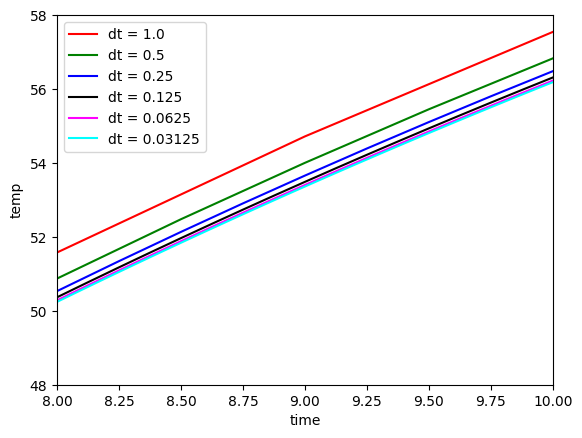

In [23]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
for j in range(0,6):
    nsteps = int(tmax/dt)
    my_time = np.linspace(dt, tmax, nsteps)
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0, nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T

    plt.plot(my_time, my_temp, color=my_color[j], label="dt = "+str(dt))
    dt = dt/2.

plt.xlabel('time')
plt.ylabel('temp')
plt.legend()
plt.xlim(8,10)
plt.ylim(48,58)

We see that the gap between the result gets smaller and smaller as $dt$ gets smaller and smaller. This problem is too simple to see the effect of $dt$ on computation time.

But on theoretical grounds, how does computation time scale?

### Challenge 1.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In [24]:
dt = 1.
my_color = ['red', 'green', 'blue', 'black', 'magenta', 'cyan']
dts, temp_at_t10s = [], []
for j in range(0,15):
    dts.append(dt)
    nsteps = int(tmax/dt)
    my_time = np.linspace(dt, tmax, nsteps)
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0, nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T

    t10_idx = np.where(my_time==10.)[0][0]
    temp_at_t10s.append(my_temp[t10_idx])

    dt = dt/2.

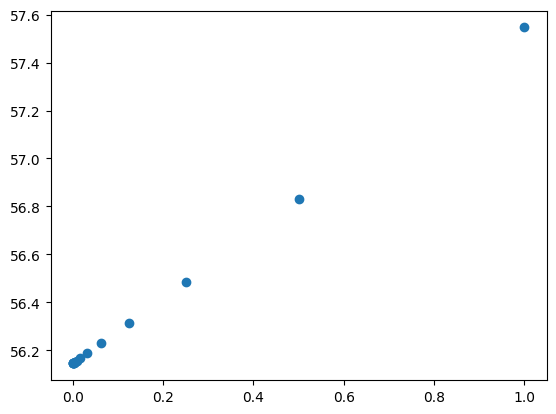

In [25]:
plt.scatter(dts, temp_at_t10s)

This shows explicit convergence to a fixed value. We'd also like to see the temperature differents

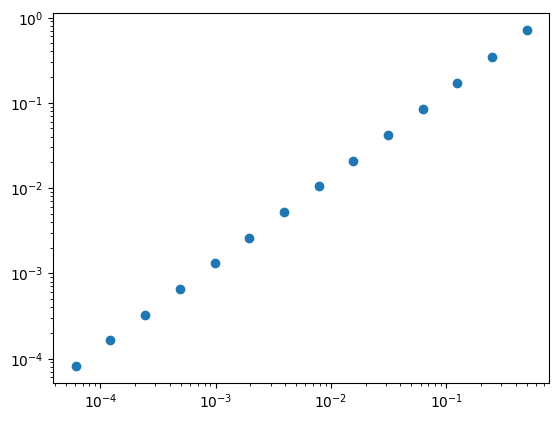

In [26]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(dts[1:], [abs(temp_at_t10s[i]-temp_at_t10s[i-1]) for i in range(1,len(dts))])

Such a beautiful line on a log-log scale tells us that the temperature difference for different dts scales as a power law. Let's find out what the exponent is by fitting a line to the data.

In [27]:
from scipy.optimize import curve_fit
func = lambda x, a, b: a*x + b

popt, pcov = curve_fit(func, np.log(dts[1:]), np.log([abs(temp_at_t10s[i]-temp_at_t10s[i-1]) for i in range(1,len(dts))]))

In [28]:
popt

array([1.004452  , 0.32696688])

The slope being $1$ tells us the power law.